In [10]:
from langgraph.graph import START, END, StateGraph  
from typing import TypedDict
from openai import OpenAI

import subprocess

class State(TypedDict):
    video_file: str
    audio_file: str
    transcription: str

In [ ]:
def extract_audio(state: State):
    output_file = state["video_file"].replace("mp4", "mp3")
    command = [
        "ffmpeg",
        "-i",
        state["video_file"],
        "-filter:a",
        "atempo=2.0", # pay an half
        "-y",
        output_file,
    ]
    subprocess.run(command)
    
    return { "audio_file": output_file }

def transcribe_audio(state: State):
    client = OpenAI()
    with open(state["audio_file"], "rb") as f:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            response_format="text",
            file=f,
            language="ko", # hint to model
            # prompt="Mizaki" # Give hint to model, words list
        )
        
    return { "transcription": transcription.text }

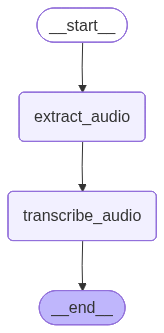

In [12]:
graph_builder = StateGraph(State)

graph_builder.add_node(extract_audio.__name__, extract_audio)
graph_builder.add_node(transcribe_audio.__name__, transcribe_audio)

graph_builder.add_edge(START, extract_audio.__name__)
graph_builder.add_edge(extract_audio.__name__, transcribe_audio.__name__)
graph_builder.add_edge(transcribe_audio.__name__, END)

graph = graph_builder.compile()

graph

In [ ]:
graph.invoke({"video_file": "lifeof20.mp4"})

ffmpeg version 8.0 Copyright (c) 2000-2025 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.6)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/8.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e